<a href="https://colab.research.google.com/github/nanpolend/365E5/blob/master/%E6%9C%80%E9%81%A9%E9%97%9C%E7%A8%85%E6%A8%A1%E5%9E%8B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-1-c69510e6aa76>:78: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  result = minimize_scalar(self.welfare, bounds=bounds, method='bounded', tol=tol)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 22283 (\N{CJK UNIFIED IDEOGRAPH-570B}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20839 (\N{CJK UNIFIED IDEOGRAPH-5167}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 31119 (\N{CJK UNIFIED IDEOGRAPH-798F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21033 (\N{CJK UNIFIED IDEOGRAPH-5229}) missing from font(s) Deja

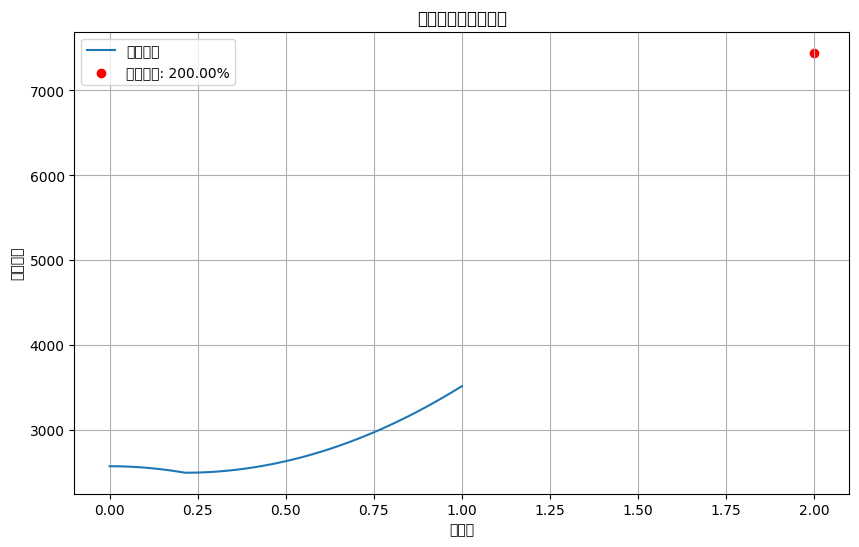

計算得到的最適關稅率為: 200.00%
當外國供給彈性為2.00時，最適關稅為200.00%
當外國供給彈性為1.00時，最適關稅為200.00%
當外國供給彈性為0.67時，最適關稅為200.00%
當外國供給彈性為0.50時，最適關稅為200.00%
當外國供給彈性為0.33時，最適關稅為0.13%


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 22806 (\N{CJK UNIFIED IDEOGRAPH-5916}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20379 (\N{CJK UNIFIED IDEOGRAPH-4F9B}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 32102 (\N{CJK UNIFIED IDEOGRAPH-7D66}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24392 (\N{CJK UNIFIED IDEOGRAPH-5F48}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24615 (\N{CJK UNIFIED IDEOGRAPH-6027}) missing from font(s) DejaVu Sans.
  fig.canvas

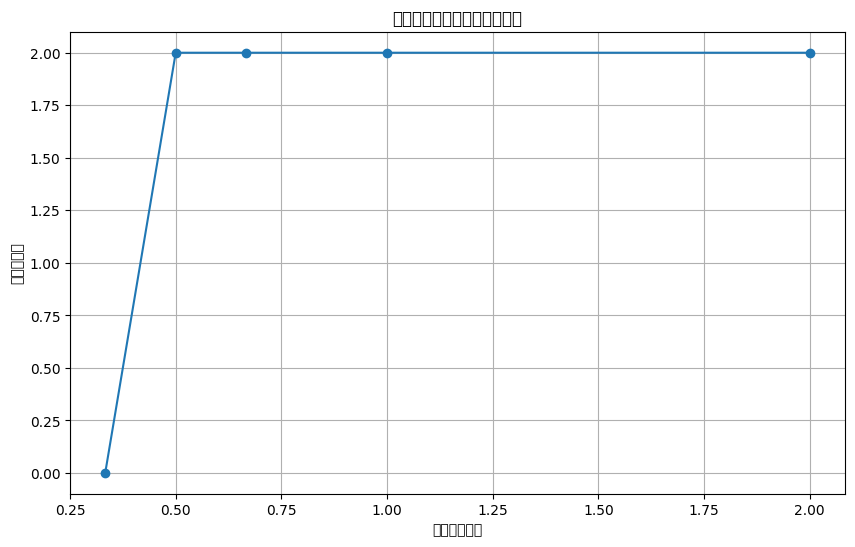

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar

class OptimalTariffModel:
    def __init__(self, alpha=100, beta=1, gamma=1, c_f=20, eta=1.5):
        """
        初始化最適關稅模型

        參數:
        alpha: 國內需求曲線的截距
        beta: 國內需求曲線的斜率
        gamma: 國內供給曲線的斜率
        c_f: 外國生產者的邊際成本
        eta: 外國出口供給彈性的倒數
        """
        self.alpha = alpha
        self.beta = beta
        self.gamma = gamma
        self.c_f = c_f
        self.eta = eta

    def foreign_export_supply(self, p_w):
        """外國出口供給函數"""
        return (p_w - self.c_f)**self.eta

    def inverse_foreign_export_supply(self, x):
        """反外國出口供給函數"""
        return self.c_f + x**(1/self.eta)

    def domestic_demand(self, p):
        """國內需求函數"""
        return max(0, (self.alpha - p) / self.beta)

    def domestic_supply(self, p):
        """國內供給函數"""
        return max(0, p / self.gamma)

    def imports(self, p):
        """進口需求函數"""
        return max(0, self.domestic_demand(p) - self.domestic_supply(p))

    def welfare(self, tariff):
        """
        計算給定關稅下的國內福利
        福利 = 消費者剩餘 + 生產者剩餘 + 關稅收入
        """
        # 世界價格 (由進口國面對的價格)
        p_w = self.inverse_foreign_export_supply(self.imports(1 + tariff))

        # 國內價格
        p_d = (1 + tariff) * p_w

        # 計算各項福利組成
        # 消費者剩餘
        cs = 0.5 * (self.alpha - p_d) * self.domestic_demand(p_d)

        # 生產者剩餘
        ps = 0.5 * p_d * self.domestic_supply(p_d)

        # 關稅收入
        tariff_revenue = tariff * p_w * self.imports(p_d)

        total_welfare = cs + ps + tariff_revenue
        return -total_welfare  # 返回負值以便最小化函數能最大化福利

    def find_optimal_tariff(self, bounds=(0, 2), tol=1e-6):
        """
        尋找最適關稅率

        參數:
        bounds: 關稅搜索範圍 (例如 0-200%)
        tol: 優化容忍度

        返回:
        最適關稅率
        """
        result = minimize_scalar(self.welfare, bounds=bounds, method='bounded', tol=tol)
        return result.x

    def plot_welfare_curve(self, tariff_range=np.linspace(0, 1, 100)):
        """繪製福利與關稅關係曲線"""
        welfares = [-self.welfare(t) for t in tariff_range]

        plt.figure(figsize=(10, 6))
        plt.plot(tariff_range, welfares, label='國內福利')

        # 標記最適關稅
        optimal_tariff = self.find_optimal_tariff()
        optimal_welfare = -self.welfare(optimal_tariff)
        plt.scatter(optimal_tariff, optimal_welfare, color='red',
                   label=f'最適關稅: {optimal_tariff:.2%}')

        plt.title('關稅與國內福利關係')
        plt.xlabel('關稅率')
        plt.ylabel('國內福利')
        plt.legend()
        plt.grid(True)
        plt.show()

        return optimal_tariff

# 示例使用
if __name__ == "__main__":
    # 初始化模型參數
    model = OptimalTariffModel(alpha=100, beta=1, gamma=1, c_f=20, eta=1.5)

    # 計算並繪製最適關稅
    optimal_tariff = model.plot_welfare_curve()
    print(f"計算得到的最適關稅率為: {optimal_tariff:.2%}")

    # 分析不同彈性下的最適關稅
    eta_values = [0.5, 1.0, 1.5, 2.0, 3.0]
    optimal_tariffs = []

    for eta in eta_values:
        m = OptimalTariffModel(eta=eta)
        opt_tariff = m.find_optimal_tariff()
        optimal_tariffs.append(opt_tariff)
        print(f"當外國供給彈性為{1/eta:.2f}時，最適關稅為{opt_tariff:.2%}")

    # 繪製彈性與最適關稅關係
    plt.figure(figsize=(10, 6))
    plt.plot([1/e for e in eta_values], optimal_tariffs, 'o-')
    plt.title('外國供給彈性與最適關稅關係')
    plt.xlabel('外國供給彈性')
    plt.ylabel('最適關稅率')
    plt.grid(True)
    plt.show()
